In [1]:
import numpy as np
import pandas as pd
from biom import Table
from biom import Table
import qiime2 as q2

np.random.seed(42)


# plotting
import colorsys
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mc
from matplotlib.pyplot import cm
from matplotlib.colors import to_hex

from mpl_toolkits.axes_grid1.inset_locator import inset_axes

plt.style.use('ggplot')
plt.rcParams["axes.grid"] = False
%matplotlib inline

In [2]:
generator_results = pd.read_csv('../../results/simulations/final-results-generator.tsv', sep='\t', index_col=0)
#generator_results = generator_results[generator_results['read depth'].isin([200, 2000, 20000])]
generator_results.head(5)



,read depth,percent tips shuffles,fold tips subset,fold shuffle,fold depth,fold evaluation,metric,score
0,2000000,no-phylogeny,0,0,0,0,PERMANOVA: F-statistic,0.419502
1,2000000,no-phylogeny,0,0,1,0,PERMANOVA: F-statistic,0.782688
2,2000000,no-phylogeny,0,0,2,0,PERMANOVA: F-statistic,0.760128
3,2000000,no-phylogeny,0,0,3,0,PERMANOVA: F-statistic,0.654126
4,2000000,no-phylogeny,0,0,4,0,PERMANOVA: F-statistic,2.880797


In [3]:
set(generator_results['percent tips shuffles'])

{'0.0', '0.25', '0.5', '0.75', '1', 'no-phylogeny'}

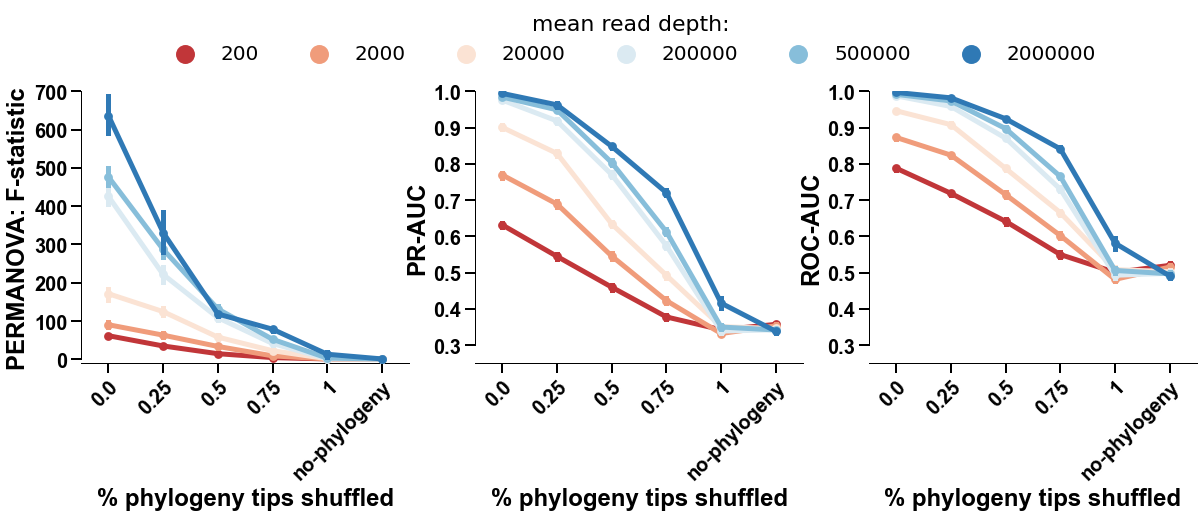

In [4]:
fig, axn = plt.subplots(1,3, figsize=(20, 5))

order_use = ['0.0', '0.25', '0.5', '0.75', '1', 'no-phylogeny']

for ax, (eval_metric, pltdf)  in zip(axn, generator_results.groupby('metric')):

    g = sns.pointplot(x='percent tips shuffles', y='score', hue='read depth',
                    order=order_use,
                    palette='RdBu', lw=10,
                    data=pltdf, ax=ax)
    plt.setp(ax.lines, linewidth=5) 
    
    if eval_metric == 'PERMANOVA: F-statistic':
        ax.set_ylim(-10, 700)
        ax.spines['left'].set_bounds(0, 700) 
    else:
        ax.set_ylim(0.25, 1.)
        ax.spines['left'].set_bounds(0.3, 1) 
        
    ax.set_facecolor('white')
    ax.set_axisbelow(True)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(True)
    ax.spines['bottom'].set_visible(True)
    ax.spines['top'].set_visible(False)

    for child in ax.get_children():
        if isinstance(child, matplotlib.spines.Spine):
            child.set_color('black')
    ax.tick_params(axis='y', colors='black', width=2, length=10)
    ax.tick_params(axis='x', colors='black', width=2, length=10)
    ax.set_xticklabels(ax.get_xticklabels(),
                       rotation=45,
                       horizontalalignment='right',
                       rotation_mode="anchor")
    for tick in ax.get_xticklabels():
        tick.set_fontproperties('arial')
        tick.set_ha("right")
        tick.set_color("black")
        tick.set_weight("bold")
        tick.set_fontsize(20)
    for tick in ax.get_yticklabels():
        tick.set_fontproperties('arial')
        tick.set_color("black")
        tick.set_weight("bold")
        tick.set_fontsize(20)
    ax.set_xlabel('% phylogeny tips shuffled',
                  fontsize=24,
                  family = 'arial',
                  weight='bold',
                  color='black')
    ax.set_ylabel(eval_metric,
                  fontsize=24,
                  family = 'arial',
                  weight='bold',
                  color='black')
    ax.legend_.remove()
    
# generate legend from last iterations     
handles, labels = ax.get_legend_handles_labels()
legend = ax.legend(handles, labels, loc=2, 
                         bbox_to_anchor=(-2.2, 1.35),
                         prop={'size':20},
                         title="mean read depth:",
                         fancybox=False, framealpha=.0,
                         ncol=7, markerscale=2.5)
legend.get_title().set_fontsize('22')
# increase the line width in the legend 
for line in legend.get_lines()[:]:
    line.set_linewidth(8.0)
for line in legend.get_lines()[:]:
    line.set_linewidth(8.0)

plt.savefig('../../results/figures/simulation-read-depth-tree-shuffle.pdf' ,
            dpi=1000, 
            bbox_inches='tight',
            facecolor=fig.get_facecolor(), 
            edgecolor='none')
plt.show()


In [17]:
generator_results_f = generator_results[generator_results.metric == 'PERMANOVA: F-statistic']
one = generator_results_f[(generator_results_f['read depth'] == 2000000)\
                    & (generator_results_f['percent tips shuffles'] == '0.0')].mean()['score']
two = generator_results_f[(generator_results_f['read depth'] == 200)\
                    & (generator_results_f['percent tips shuffles'] == '0.0')].mean()['score']

one/two


10.322966018570423

In [21]:
generator_results_f = generator_results[generator_results.metric == 'PR-AUC']
one = generator_results_f[(generator_results_f['read depth'] == 2000000)\
                    & (generator_results_f['percent tips shuffles'] == '0.0')].mean()['score']
two = generator_results_f[(generator_results_f['read depth'] == 200)\
                    & (generator_results_f['percent tips shuffles'] == '0.0')].mean()['score']

(one - two) * 100

36.29668152506058